In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Import MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


<Axes: ylabel='count'>

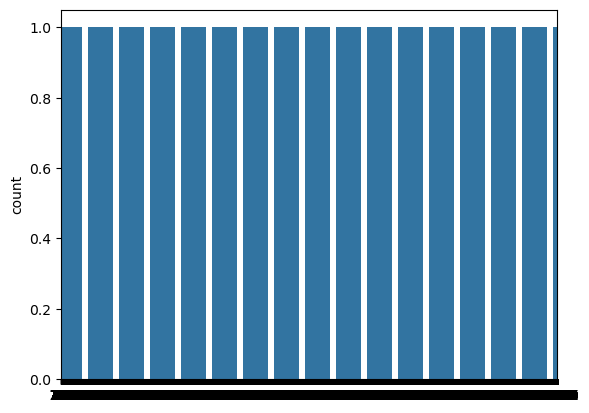

In [7]:
# Review digit counts
sns.countplot(y_train)

In [34]:
# Check for null values
np.isnan(x_train).any()

False

In [13]:
np.isnan(x_test).any()

False

In [17]:
np.isnan(y_train).any()

False

In [19]:
np.isnan(y_test).any()

False

In [22]:
# Review training labels
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [26]:
# Normalize images from 0 - 255 to 0 - 1
input_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = x_train / 255.0

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test = x_test / 255.0

In [28]:
# Apply one hot encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth = 10)
y_test = tf.one_hot(y_test.astype(np.int32), depth = 10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


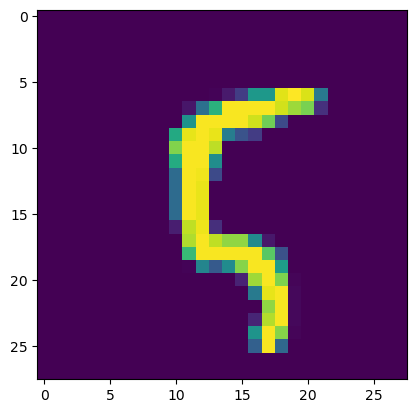

In [30]:
# View the 101st image
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [48]:
batch_size = 64
num_classes = 10
epochs = 6
validation_split = 0.1

In [46]:
model = tf.keras.models.Sequential([
    # Convolution layers
    tf.keras.layers.Conv2D(32, (5, 5), padding = 'same', activation = 'relu', input_shape = input_shape),
    tf.keras.layers.Conv2D(32, (5, 5), padding = 'same', activation = 'relu'),
    # Downsampling filter/layer
    tf.keras.layers.MaxPool2D(),
    # Regularization layer
    tf.keras.layers.Dropout(0.25),
    # Convolution layers
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    # Downsampling
    tf.keras.layers.MaxPool2D(),
    # Regularization
    tf.keras.layers.Dropout(0.25),
    # Flatten to 1D vector
    tf.keras.layers.Flatten(),
    # Classify (128 output neurons)
    tf.keras.layers.Dense(128, activation = 'relu'),
    # Regularization
    tf.keras.layers.Dropout(0.5),
    # Classify (10 outpot neurons for 0 - 9)
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

# Loss function
model.compile(optimizer = tf.keras.optimizers.RMSprop(epsilon = 1e-08), loss = 'categorical_crossentropy', metrics=['acc'])

In [54]:
# Fit the training data (manage resources)
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.995):
            print("\nReached 99.5% accuracy, cancelling training!!!")
            self.model.stop_training = True

callbacks = myCallback()

In [56]:
# Fit data
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1, callbacks=[callbacks])

Epoch 1/6
844/844 [==============================] - 98s 114ms/step - loss: 0.2154 - acc: 0.9331 - val_loss: 0.0466 - val_acc: 0.9868
Epoch 2/6
844/844 [==============================] - 111s 131ms/step - loss: 0.0776 - acc: 0.9782 - val_loss: 0.0299 - val_acc: 0.9917
Epoch 3/6
844/844 [==============================] - 108s 128ms/step - loss: 0.0602 - acc: 0.9827 - val_loss: 0.0286 - val_acc: 0.9928
Epoch 4/6
844/844 [==============================] - 103s 123ms/step - loss: 0.0535 - acc: 0.9856 - val_loss: 0.0288 - val_acc: 0.9930
Epoch 5/6
844/844 [==============================] - 108s 129ms/step - loss: 0.0496 - acc: 0.9864 - val_loss: 0.0331 - val_acc: 0.9907
Epoch 6/6
844/844 [==============================] - 114s 135ms/step - loss: 0.0458 - acc: 0.9874 - val_loss: 0.0290 - val_acc: 0.9912


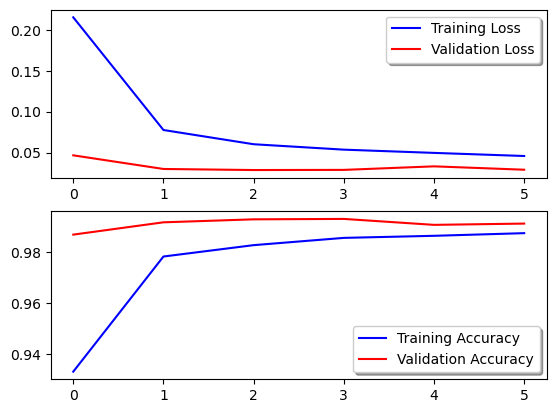

In [66]:
# Plot loss and accuracy
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color = 'b', label = "Training Loss")
ax[0].plot(history.history['val_loss'], color = 'r', label = "Validation Loss")
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['acc'], color = 'b', label = "Training Accuracy")
ax[1].plot(history.history['val_acc'], color = 'r', label = "Validation Accuracy")
legend = ax[1].legend(loc = 'best', shadow = True)

In [68]:
# Predict/Test testing data
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0220 - acc: 0.9931


In [76]:
# Confusion matrix ( performance evaluation table)

# Predict values 
Y_pred = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [78]:
print(Y_pred[:5])

[[1.27763133e-08 1.14193938e-06 3.92330821e-06 1.87815590e-06
  1.30954035e-07 2.54307455e-08 2.13461562e-12 9.99982476e-01
  4.92270438e-08 1.03785997e-05]
 [5.00494117e-08 2.77447025e-08 1.00000000e+00 3.29703737e-10
  4.46825954e-09 1.19537301e-13 1.03955164e-08 1.81605664e-09
  4.19758983e-09 5.36366264e-12]
 [1.44923752e-06 9.99747574e-01 1.06915377e-05 3.70785301e-07
  1.19971526e-04 2.04680618e-05 4.25684775e-05 3.84399609e-05
  9.29356793e-06 9.01551539e-06]
 [9.99864221e-01 1.42024783e-08 8.12677172e-06 9.17999898e-08
  3.43128875e-07 3.43625766e-06 9.53751369e-05 9.50426170e-07
  5.63180083e-06 2.17639299e-05]
 [1.48482324e-10 2.20764446e-06 3.29422747e-08 9.10302056e-10
  9.99935985e-01 3.93309961e-07 2.98934935e-07 8.29238829e-08
  3.83304496e-07 6.05133464e-05]]


In [82]:
# Convert probabilities to predicted class labels
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print(Y_pred_classes[:5])

[7 2 1 0 4]


In [86]:
# Convert one-hot test labes to integers
Y_test_int = np.argmax(y_test, axis = 1)

In [88]:
# Compute confusion matrix
confusion_Mat = tf.math.confusion_matrix(Y_test_int, Y_pred_classes)

<Axes: >

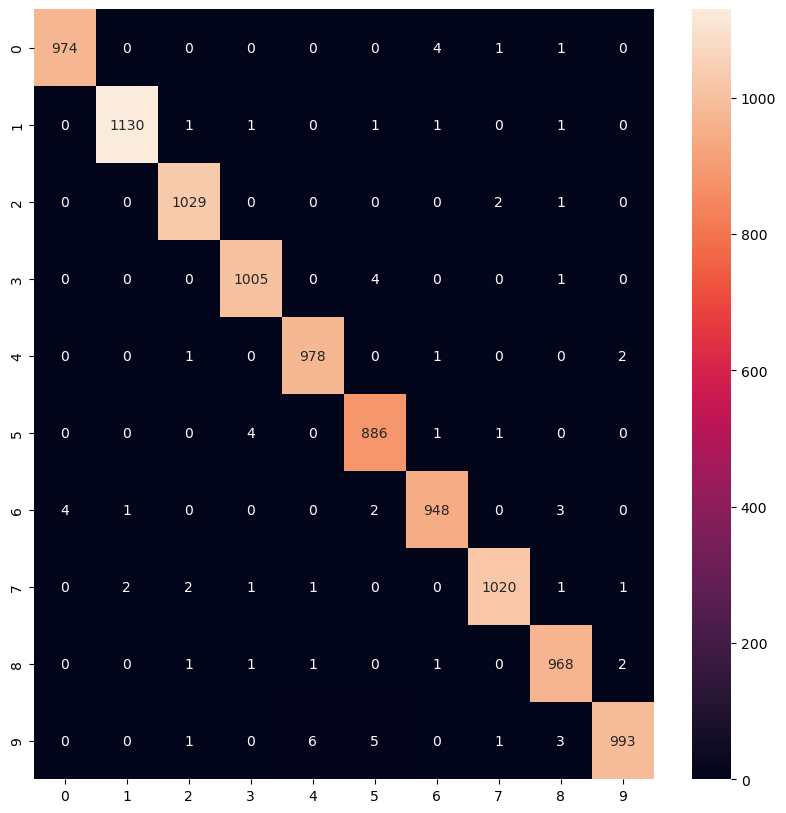

In [92]:
# Plot it
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_Mat, annot = True, fmt = 'g')